In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import sys

sys.path.append("./markdown.py")
import markdown as md

from matplotlib import style
from matplotlib.pyplot import figure
style.use('ggplot')
plt_height = 6
plt_length = 16

md_head = ['I[A]', 'U[V]', 'Time', 'R[Ω]']
md_fields = [0, 1, 2, 3]
md_align = [('>', '>'), ('>', '>'), ('>', '>'), ('>', '>')]

In [2]:
Ix = [4.90, 7.97, 11.9, 16.46, 20.15, 25.03, 29.96, 35.03, 39.58, 44.79]
Ux = [2.27, 2.46, 2.86, 3.22, 3.45, 3.75, 3.86, 3.93, 4.02, 4.15]
tx = ["8:57", "5:10", "3:27", "2:36", "2:2", "1:39", "1:13", "1:0", "0:50", "0:42"]
    
    
lx = len(tx)
secx = np.zeros(lx)

for i in range(lx):
    secx[i] = sum([a * b for a,b in zip([60,1], map(int,tx[i].split(':')))])

Rx = [a / b for a, b in zip(Ux, Ix)]
Px = [a * b for a, b in zip(Ix, Ux)]
Wx = [a * b for a, b in zip(Px, secx)]

array = [0 for i in range(lx)] 
for i in range(lx):
    array[i] = [Ix[i], Ux[i], tx[i], round(Rx[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] | Time |  R[Ω] |
| ----: | ---: | ---: | ----: |
|   4.9 | 2.27 | 8:57 | 0.463 |
|  7.97 | 2.46 | 5:10 | 0.309 |
|  11.9 | 2.86 | 3:27 |  0.24 |
| 16.46 | 3.22 | 2:36 | 0.196 |
| 20.15 | 3.45 |  2:2 | 0.171 |
| 25.03 | 3.75 | 1:39 |  0.15 |
| 29.96 | 3.86 | 1:13 | 0.129 |
| 35.03 | 3.93 |  1:0 | 0.112 |
| 39.58 | 4.02 | 0:50 | 0.102 |
| 44.79 | 4.15 | 0:42 | 0.093 |


In [3]:
I0 = [3.900, 5.010, 6.979, 7.599, 8.679, 10.23, 12.13, 13.70, 15.16]
U0 = [6.530, 7.330, 8.919, 9.129, 9.699, 10.32, 11.38, 12.11, 12.49]
t0 = ["11:10", "08:30", "05:52", "05:11", "04:20", "03:46", "03:09", "02:38", "02:31"]
l0 = len(t0)
sec0 = np.zeros(l0)

for i in range(l0):
    sec0[i] = sum([a * b for a,b in zip([60,1], map(int,t0[i].split(':')))])

R0 = [a / b for a, b in zip(U0, I0)]
P0 = [a * b for a, b in zip(I0, U0)]
W0 = [a * b for a, b in zip(P0, sec0)]

array = [0 for i in range(l0)] 
for i in range(l0):
    array[i] = [I0[i], U0[i], t0[i], round(R0[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] |  U[V] |  Time |  R[Ω] |
| ----: | ----: | ----: | ----: |
|   3.9 |  6.53 | 11:10 | 1.674 |
|  5.01 |  7.33 | 08:30 | 1.463 |
| 6.979 | 8.919 | 05:52 | 1.278 |
| 7.599 | 9.129 | 05:11 | 1.201 |
| 8.679 | 9.699 | 04:20 | 1.118 |
| 10.23 | 10.32 | 03:46 | 1.009 |
| 12.13 | 11.38 | 03:09 | 0.938 |
|  13.7 | 12.11 | 02:38 | 0.884 |
| 15.16 | 12.49 | 02:31 | 0.824 |


In [4]:
I2 = [4.05, 5.57, 8.08, 11.19, 14.83, 16.70, 20.46, 23.52, 28.73, 33.76, 39.47, 47.50, 54.5, 67.3, 82.90]
U2 = [3.82,3.92,4.12,4.30,4.54, 4.62, 4.97, 5.15,5.66, 5.87, 6.18, 6.58, 6.93, 7.53, 8.44]
t2 = ["10:10", "08:12", "05:00" , "03:32", "02:30", "02:13", "01:48", "01:34", "01:17", "01:06", "00:56", "00:46", "00:42", "00:33", "00:27"]
l2 = len(t2)
sec2 = np.zeros(l2)

for i in range(l2):
    sec2[i] = sum([a * b for a,b in zip([60,1], map(int,t2[i].split(':')))])

R2 = [a / b for a, b in zip(U2, I2)]
P2 = [a * b for a, b in zip(I2, U2)]
W2 = [a * b for a, b in zip(P2, sec2)]

array = [0 for i in range(l2)] 
for i in range(l2):
    array[i] = [I2[i], U2[i], t2[i], round(R2[i], 3)]

md.table(sys.stdout, array, md_fields, md_head, md_align)

|  I[A] | U[V] |  Time |  R[Ω] |
| ----: | ---: | ----: | ----: |
|  4.05 | 3.82 | 10:10 | 0.943 |
|  5.57 | 3.92 | 08:12 | 0.704 |
|  8.08 | 4.12 | 05:00 |  0.51 |
| 11.19 |  4.3 | 03:32 | 0.384 |
| 14.83 | 4.54 | 02:30 | 0.306 |
|  16.7 | 4.62 | 02:13 | 0.277 |
| 20.46 | 4.97 | 01:48 | 0.243 |
| 23.52 | 5.15 | 01:34 | 0.219 |
| 28.73 | 5.66 | 01:17 | 0.197 |
| 33.76 | 5.87 | 01:06 | 0.174 |
| 39.47 | 6.18 | 00:56 | 0.157 |
|  47.5 | 6.58 | 00:46 | 0.139 |
|  54.5 | 6.93 | 00:42 | 0.127 |
|  67.3 | 7.53 | 00:33 | 0.112 |
|  82.9 | 8.44 | 00:27 | 0.102 |


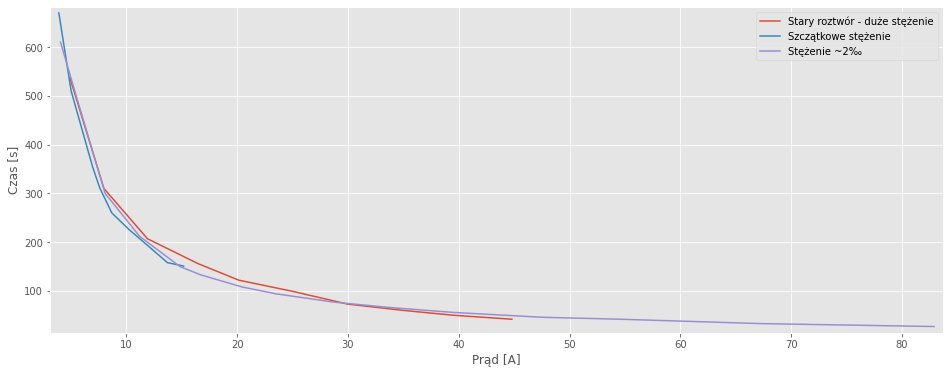

In [14]:
figure(1, figsize=(plt_length, plt_height)) 
plt.plot(Ix, secx)
plt.plot(I0, sec0)
plt.plot(I2, sec2)
plt.xlabel("Prąd [A]")
plt.ylabel("Czas [s]")
plt.legend(["Stary roztwór - duże stężenie", "Szczątkowe stężenie", "Stężenie ~2‰"])
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-time.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-time.pdf", bbox_inches = 'tight')
plt.show()

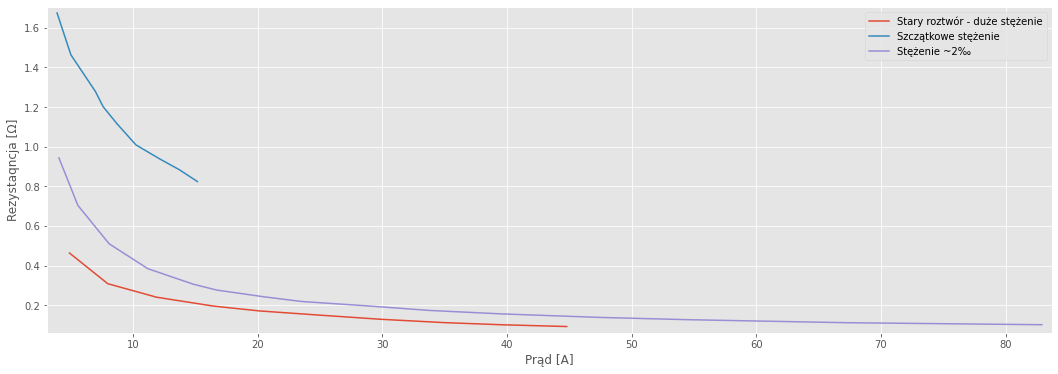

In [15]:
figure(1, figsize=(18, plt_height)) 
plt.plot(Ix, Rx)
plt.plot(I0, R0)
plt.plot(I2, R2)
plt.xlabel("Prąd [A]")
plt.ylabel("Rezystaqncja [Ω]")
plt.legend(["Stary roztwór - duże stężenie", "Szczątkowe stężenie", "Stężenie ~2‰"])
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-ohm.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-ohm.pdf", bbox_inches = 'tight')
plt.show()